In [1]:
import bagpy
from bagpy import bagreader
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt
import numpy as np
from functools import reduce
from scipy.spatial.transform import Rotation

In [2]:
def drop_columns_in_df(df):
    return df.drop(columns=["header.seq", "header.stamp.secs", "header.stamp.nsecs", "header.frame_id"])

def rename_columns(df, new_colum_names: list):
    column_names = ['Time'] + new_colum_names
    
    df.columns= column_names

    return df

def sync_dfs_based_on_time(dataframes: list):
    df_merged = reduce(lambda left,right: pd.merge_asof(left, right, on="Time", allow_exact_matches=False, direction="nearest"), dataframes)

    return df_merged

def df_from_pose_to_euler(df):
    quat_df = df[['pose.orientation.x', 'pose.orientation.y', 'pose.orientation.z', 'pose.orientation.w']]
    rot = Rotation.from_quat(quat_df)
    rot_euler = rot.as_euler('xyz', degrees=False)
    euler_df = pd.DataFrame(data=rot_euler, columns=['roll', 'pitch', 'yaw'])

    conc = [df, euler_df]

    df_gt_euler = pd.concat(
        conc,
        axis=1,
        join="outer",
        ignore_index=False,
        keys=None,
        levels=None,
        names=None,
        verify_integrity=False,
        copy=True,
    )

    df_gt_euler = drop_columns_in_df(df_gt_euler)
    df_gt_euler.drop(columns=["pose.position.x", "pose.position.y", "pose.position.z", "pose.orientation.x", "pose.orientation.y","pose.orientation.z","pose.orientation.w"], inplace=True)

    return df_gt_euler

In [24]:
b = bagreader('/home/msccomputer/catkin_ws/src/out/rosbag/lab/attitude_test/2022-11-01-14-52-19.bag')


b.topic_table

[INFO]  Successfully created the data folder /home/msccomputer/catkin_ws/src/out/rosbag/lab/attitude_test/2022-11-01-14-52-19.


,Topics,Types,Message Count,Frequency
0,/anafi/attitude,geometry_msgs/QuaternionStamped,1267,31.059256
1,/anafi/gnss_location,sensor_msgs/NavSatFix,1267,31.245979
2,/anafi/height,olympe_bridge/Float32Stamped,1267,31.083194
3,/anafi/image,sensor_msgs/Image,1267,30.511352
4,/anafi/ned_pose_from_gnss,geometry_msgs/PointStamped,1267,31.062476
5,/anafi/odometry,nav_msgs/Odometry,1265,22.827511
6,/anafi/optical_flow_velocities,geometry_msgs/Vector3Stamped,1267,31.176304
7,/anafi/polled_body_velocities,geometry_msgs/TwistStamped,211,4.986867
8,/anafi/pose,geometry_msgs/PoseStamped,1266,30.785464
9,/qualisys/Anafi/odom,nav_msgs/Odometry,4225,103.291443


In [25]:
gt_pose = b.message_by_topic('/qualisys/Anafi/pose')
df_gt_pose = pd.read_csv(gt_pose)

df_gt_pose

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,pose.position.x,pose.position.y,pose.position.z,pose.orientation.x,pose.orientation.y,pose.orientation.z,pose.orientation.w
0,1.667311e+09,36239,1667310742,18647671,mocap,0.493930,0.107525,-1.750299,0.009180,-0.006009,0.867947,-0.496536
1,1.667311e+09,36240,1667310742,28647661,mocap,0.494021,0.107664,-1.747930,0.009170,-0.005492,0.867759,-0.496870
2,1.667311e+09,36241,1667310742,38647652,mocap,0.494011,0.107659,-1.744986,0.010336,-0.007632,0.867296,-0.497626
3,1.667311e+09,36242,1667310742,48647642,mocap,0.493964,0.107604,-1.742222,0.010078,-0.006289,0.867233,-0.497761
4,1.667311e+09,36243,1667310742,58647633,mocap,0.494097,0.107588,-1.739423,0.010132,-0.007934,0.866659,-0.498735
...,...,...,...,...,...,...,...,...,...,...,...,...
4220,1.667311e+09,40459,1667310784,218647718,mocap,0.508852,0.110496,-1.520017,-0.009427,0.002487,-0.596566,0.802505
4221,1.667311e+09,40460,1667310784,228647709,mocap,0.508806,0.110527,-1.519716,-0.011949,0.001775,-0.596418,0.802583
4222,1.667311e+09,40461,1667310784,238647699,mocap,0.508962,0.110609,-1.519821,-0.013986,0.001825,-0.597348,0.801858
4223,1.667311e+09,40462,1667310784,248647690,mocap,0.508892,0.110574,-1.519720,-0.012973,0.001931,-0.596941,0.802178


In [26]:
df_gt_euler = df_from_pose_to_euler(df_gt_pose)
df_gt_euler = rename_columns(df_gt_euler, ["gt_roll", "gt_pitch", "gt_yaw"])

df_gt_euler

# #EXPERIMENTAL
# quat_df = df_gt_pose[['pose.orientation.x', 'pose.orientation.y', 'pose.orientation.z', 'pose.orientation.w']]
# rot = Rotation.from_quat(quat_df)
# rot_euler = rot.as_euler('xyz', degrees=True)
# drone_rpy_corrected = rot_euler + (1, 5.5, 0) ## OFFSET

# euler_df = pd.DataFrame(data=drone_rpy_corrected, columns=['roll', 'pitch', 'yaw'])

# conc = [df_gt_pose, euler_df]

# df_gt_euler = pd.concat(
#     conc,
#     axis=1,
#     join="outer",
#     ignore_index=False,
#     keys=None,
#     levels=None,
#     names=None,
#     verify_integrity=False,
#     copy=True,
# )

# df_gt_euler = drop_columns_in_df(df_gt_euler)
# df_gt_euler.drop(columns=["pose.position.x", "pose.position.y", "pose.position.z", "pose.orientation.x", "pose.orientation.y","pose.orientation.z","pose.orientation.w"], inplace=True)

# df_gt_euler = rename_columns(df_gt_euler, ["gt_roll", "gt_pitch", "gt_yaw"])

# df_gt_euler

,Time,gt_roll,gt_pitch,gt_yaw
0,1.667311e+09,-0.019549,-0.009969,-2.102220
1,1.667311e+09,-0.018647,-0.010457,-2.101454
2,1.667311e+09,-0.023528,-0.010333,-2.099656
3,1.667311e+09,-0.020945,-0.011220,-2.099363
4,1.667311e+09,-0.023863,-0.009648,-2.097104
...,...,...,...,...
4220,1.667311e+09,-0.018098,-0.007256,-1.278437
4221,1.667311e+09,-0.021301,-0.011404,-1.278048
4222,1.667311e+09,-0.024614,-0.013783,-1.280359
4223,1.667311e+09,-0.023122,-0.012391,-1.279351


In [27]:
anafi_pose = b.message_by_topic('/anafi/pose')
df_anafi_pose = pd.read_csv(anafi_pose)

df_anafi_pose

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,pose.position.x,pose.position.y,pose.position.z,pose.orientation.x,pose.orientation.y,pose.orientation.z,pose.orientation.w
0,1.667311e+09,1,1667310740,2257108,world,63.418219,10.401666,1.633026,-0.004499,0.007344,-0.876365,0.481570
1,1.667311e+09,2,1667310740,13622045,world,63.418219,10.401666,1.627365,-0.004195,0.007768,-0.876191,0.481883
2,1.667311e+09,3,1667310740,43142795,world,63.418219,10.401666,1.614517,-0.004809,0.008005,-0.875821,0.482545
3,1.667311e+09,4,1667310740,98210334,world,63.418219,10.401666,1.605988,-0.005789,0.007935,-0.875321,0.483443
4,1.667311e+09,5,1667310740,132131099,world,63.418219,10.401666,1.594711,-0.006589,0.007432,-0.874542,0.484848
...,...,...,...,...,...,...,...,...,...,...,...,...
1261,1.667311e+09,1262,1667310782,48200607,world,63.418223,10.401676,1.400070,-0.006808,0.006308,-0.606635,0.794927
1262,1.667311e+09,1263,1667310782,72881460,world,63.418223,10.401676,1.399551,-0.007174,0.006310,-0.606810,0.794789
1263,1.667311e+09,1264,1667310782,162348985,world,63.418223,10.401676,1.409760,-0.007479,0.006494,-0.606840,0.794762
1264,1.667311e+09,1265,1667310782,169767141,world,63.418223,10.401676,1.409470,-0.007601,0.006613,-0.606635,0.794916


In [28]:
df_anafi_euler = df_from_pose_to_euler(df_anafi_pose)

df_anafi_euler = rename_columns(df_anafi_euler, ["anafi_roll_quat", "anafi_pitch_quat", "anafi_yaw_quat"])

df_anafi_euler

,Time,anafi_roll_quat,anafi_pitch_quat,anafi_yaw_quat
0,1.667311e+09,-0.017207,-0.000813,-2.136654
1,1.667311e+09,-0.017657,0.000135,-2.135946
2,1.667311e+09,-0.018665,-0.000697,-2.134421
3,1.667311e+09,-0.019490,-0.002463,-2.132347
4,1.667311e+09,-0.019390,-0.004318,-2.129118
...,...,...,...,...
1261,1.667311e+09,-0.018477,0.001769,-1.303723
1262,1.667311e+09,-0.019063,0.001324,-1.304165
1263,1.667311e+09,-0.019771,0.001245,-1.304244
1264,1.667311e+09,-0.020109,0.001291,-1.303733


In [29]:
merged_frame = sync_dfs_based_on_time([df_anafi_euler, df_gt_euler]) #, df_anafi_rpy])

In [33]:
merged_frame['roll_diff'] = merged_frame['anafi_roll_quat'] - merged_frame['gt_roll']
merged_frame['pitch_diff'] = merged_frame['anafi_pitch_quat'] - merged_frame['gt_pitch']
merged_frame['yaw_diff'] = merged_frame['anafi_yaw_quat'] - merged_frame['gt_yaw']

print("DIFF ROLL ", merged_frame['roll_diff'].mean())
print("DIFF PITCH ", merged_frame['pitch_diff'].mean())
print("DIFF YAW ", merged_frame['yaw_diff'].mean())

print(merged_frame['anafi_roll_quat'].mean())
print(merged_frame['gt_roll'].mean())
print(merged_frame['anafi_pitch_quat'].mean())
print(merged_frame['gt_pitch'].mean())

print()

DIFF ROLL  6.223859634515893e-05
DIFF PITCH  0.006473797415459844
DIFF YAW  0.024526836263584477
-0.02177095347502953
-0.021833192071374685
0.0007822897066444432
-0.005691507708815401



In [31]:
merged_frame["yaw_diff"] = merged_frame["gt_yaw"] - merged_frame["anafi_yaw_quat"]

print(merged_frame['yaw_diff'].mean())

-0.024526836263584477


<AxesSubplot: xlabel='Time'>

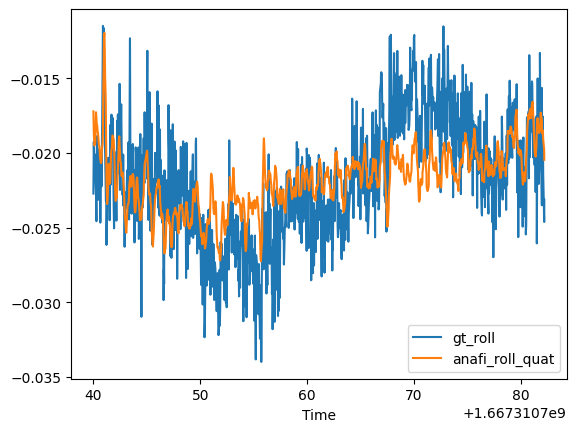

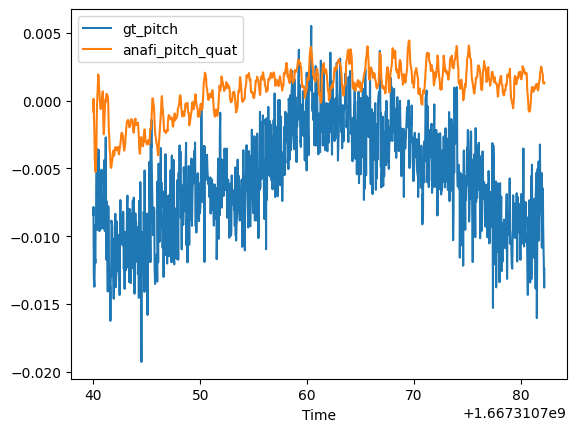

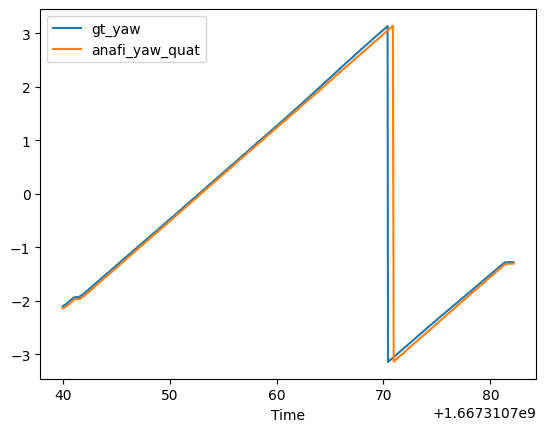

In [32]:
# merged_frame.plot(x="Time", y=['anafi_roll_quat', 'gt_roll', 'anafi_roll_rpy'])
# merged_frame.plot(x="Time", y=['anafi_pitch_quat', 'gt_pitch', 'anafi_pitch_rpy'])
# merged_frame.plot(x="Time", y=['anafi_yaw_quat', 'gt_yaw', 'anafi_yaw_rpy'])

merged_frame.plot(x="Time", y=['gt_roll', 'anafi_roll_quat'])
merged_frame.plot(x="Time", y=['gt_pitch', 'anafi_pitch_quat'])
merged_frame.plot(x="Time", y=['gt_yaw', 'anafi_yaw_quat'])

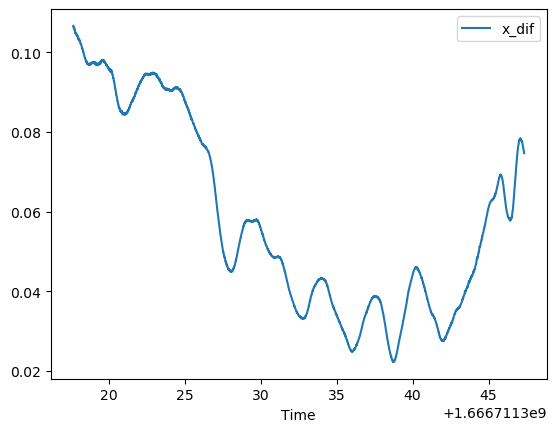

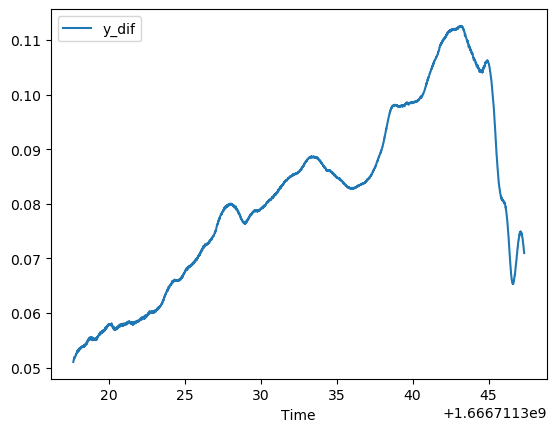

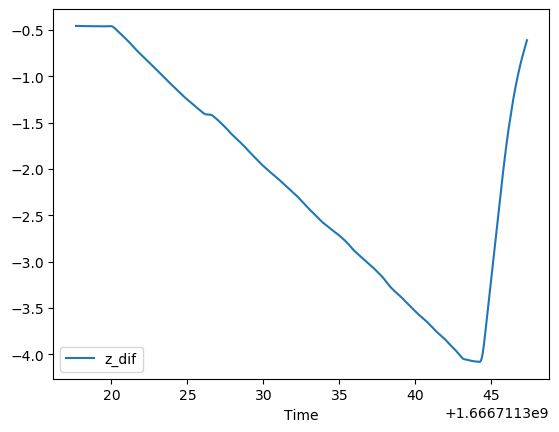

In [14]:
gt_anafi_pose = b.message_by_topic('/qualisys/Anafi/pose')
df_gt_anafi_pose = pd.read_csv(gt_anafi_pose)

df_gt_anafi_pose = drop_columns_in_df(df_gt_anafi_pose)
df_gt_anafi_pose.drop(columns=["pose.orientation.x", "pose.orientation.y", "pose.orientation.z", "pose.orientation.w"], inplace=True)
df_gt_anafi_pose = rename_columns(df_gt_anafi_pose, ["anafi_x", "anafi_y", "anafi_z"])

gt_platform_pose = b.message_by_topic('/qualisys/Platform/pose')
df_gt_platform_pose = pd.read_csv(gt_platform_pose)

df_gt_platform_pose = drop_columns_in_df(df_gt_platform_pose)
df_gt_platform_pose.drop(columns=["pose.orientation.x", "pose.orientation.y", "pose.orientation.z", "pose.orientation.w"], inplace=True)
df_gt_platform_pose = rename_columns(df_gt_platform_pose, ["platform_x", "platform_y", "platform_z"])

df_gt_NED = sync_dfs_based_on_time([df_gt_platform_pose, df_gt_anafi_pose])

df_gt_NED["x_dif"] = df_gt_anafi_pose["anafi_x"] - df_gt_platform_pose["platform_x"]
df_gt_NED["y_dif"] = df_gt_anafi_pose["anafi_y"] - df_gt_platform_pose["platform_y"]
df_gt_NED["z_dif"] = df_gt_anafi_pose["anafi_z"] - df_gt_platform_pose["platform_z"]
df_gt_NED.plot(x="Time", y=['x_dif'])
df_gt_NED.plot(x="Time", y=['y_dif'])
df_gt_NED.plot(x="Time", y=['z_dif'])